In [1]:
from policyengine_us import Simulation


situation = {
  "people": {
    "you": {
      "age": {
        "2026": 40
      }
    },
    "your partner": {
      "age": {
        "2026": 40
      }
    },
    "your first dependent": {
      "age": {
        "2026": 3
      }
    }
  },
  "families": {
    "your family": {
      "members": [
        "you",
        "your partner",
        "your first dependent"
      ]
    }
  },
  "marital_units": {
    "your marital unit": {
      "members": [
        "you",
        "your partner"
      ]
    },
    "your first dependent's marital unit": {
      "members": [
        "your first dependent"
      ],
      "marital_unit_id": {
        "2026": 1
      }
    }
  },
  "tax_units": {
    "your tax unit": {
      "members": [
        "you",
        "your partner",
        "your first dependent"
      ]
    }
  },
  "spm_units": {
    "your household": {
      "members": [
        "you",
        "your partner",
        "your first dependent"
      ]
    }
  },
  "households": {
    "your household": {
      "members": [
        "you",
        "your partner",
        "your first dependent"
      ],
      "state_name": {
        "2026": "NY"
      },
      "county_fips": {
        "2026": "36061"
      }
    }
  },
  "axes": [
    [
      {
        "name": "employment_income",
        "count": 200,
        "min": 0,
        "max": 200000
      }
    ]
  ]
}

simulation = Simulation(
    situation=situation,
)

output = simulation.calculate("household_net_income", 2026)
print(output)

/Users/daphnehansell/miniconda3/envs/policyengine/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[ 30725.723  31968.25   33207.184  34570.793  35692.676  36714.066
  37733.652  38752.348  39774.633  40793.324  41814.715  42997.117
  44300.266  45146.207  45897.875  46653.14   47381.867  48094.14
  48802.812  49515.09   50226.465  50936.04   51647.41   52356.99
  53068.363  53777.938  54489.312  55198.883  55910.258  56439.17
  56921.53   57402.098  57879.07   58354.125  58830.973  59207.617
  59574.227  59637.74   60102.312  60724.35   61346.395  61967.812
  62587.098  63206.39   63825.668  64444.96   64563.81   65183.1
  65802.38   66421.664  67040.95   67660.24   68262.02   68859.26
  69616.49   70442.74   71268.984  72095.234  72921.49   73747.74
  74573.984  75400.24   76226.5    77052.734  77878.99   78705.24
  79531.5    80357.734  81183.99   82010.25   82836.5    83662.74
  84488.99   85315.25   86141.5    86967.74   87794.     88620.25
  89446.51   90272.74   91099.     91925.25   92751.51   93577.75
  94404.     95230.24   96056.51   96882.75   97709.01   98535.24
  99361

In [2]:
mtr = simulation.calculate("marginal_tax_rate", 2026)
print(mtr)

[-0.12699807 -0.12699807  0.         -0.12430084 -0.12430084  0.
 -0.2327187  -0.2327187   0.         -0.02779686 -0.02779686  0.
  0.07450002  0.07450002  0.          0.07450002  0.07450002  0.
  0.07450002  0.07450002  0.          0.07450002  0.07450002  0.
  0.07450002  0.07450002  0.          0.07450002  0.07450002  0.
 -0.05150783 -0.05150783  0.         -0.21841407 -0.21841407  0.
  0.22432423  0.22432423  0.          0.31770313  0.31770313  0.
  0.31499612  0.31499612  0.          0.33664846  0.33664846  0.
  0.35399997  0.35399997  0.          0.3567031   0.3567031   0.
  0.35310155  0.35310155  0.          0.35669923  0.35669923  0.
  0.3558008   0.3558008   0.          0.35669923  0.35669923  0.
  0.35579687  0.35579687  0.          0.3567031   0.3567031   0.
  0.35580468  0.35580468  0.          0.35669923  0.35669923  0.
  0.35580468  0.35580468  0.          0.3566953   0.3566953   0.
  0.5151875   0.5151875   0.          0.56444144  0.56444144  0.
  0.563539    0.563539   

NameError: name 'mtr' is not defined

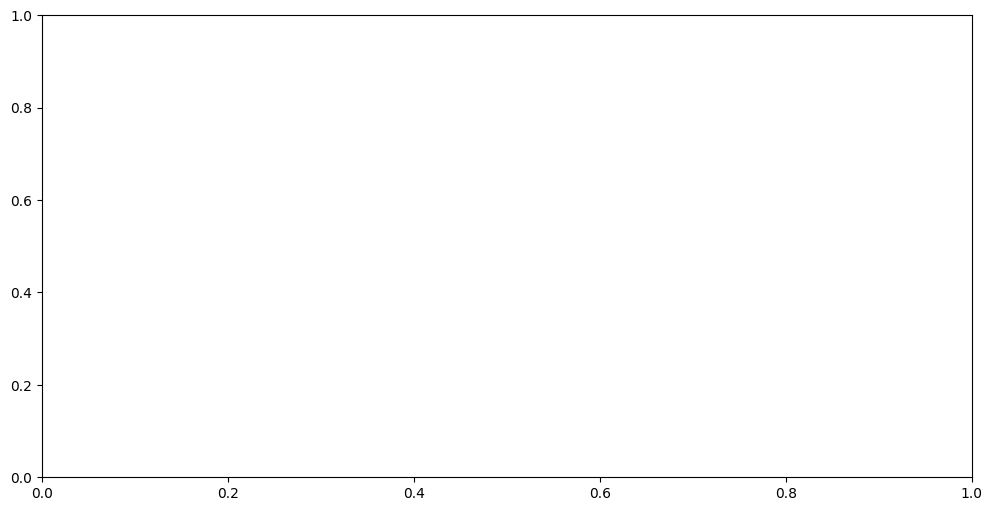

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Get the income values from the simulation axes
income_values = np.linspace(0, 200000, 200)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot marginal tax rate
ax.plot(income_values, mtr * 100, linewidth=2, color='steelblue')

# Format the plot
ax.set_xlabel('Employment Income ($)', fontsize=12)
ax.set_ylabel('Marginal Tax Rate (%)', fontsize=12)
ax.set_title('Marginal Tax Rate by Income\n(NY Couple with 1 Child, 2026)', fontsize=14)

# Add grid for better readability
ax.grid(True, alpha=0.3, linestyle='--')

# Format x-axis to show dollar amounts
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Set y-axis limits to show full range including negative rates
ax.set_ylim(min(mtr * 100) - 5, max(mtr * 100) + 5)

# Add horizontal line at 0% for reference
ax.axhline(y=0, color='gray', linestyle='-', alpha=0.5, linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()

# Print some statistics
print(f"Minimum MTR: {min(mtr)*100:.2f}%")
print(f"Maximum MTR: {max(mtr)*100:.2f}%")
print(f"Average MTR: {np.mean(mtr)*100:.2f}%")

In [6]:
import sys
print("Python executable:", sys.executable)
print("Python version:", sys.version)

Python executable: /Users/daphnehansell/miniconda3/envs/policyengine/bin/python
Python version: 3.10.16 (main, Dec 11 2024, 10:22:29) [Clang 14.0.6 ]


In [7]:
import matplotlib.pyplot as plt
print("Matplotlib successfully imported!")
print("Matplotlib version:", plt.matplotlib.__version__)

Matplotlib successfully imported!
Matplotlib version: 3.10.6


In [9]:
import matplotlib.pyplot as plt
import numpy as np

# The MTR array has 3 values per income point (likely for different earners)
# Let's extract just the primary values (every 3rd value starting from index 0)
mtr_primary = mtr[::3]

# Get the income values from the simulation axes
income_values = np.linspace(0, 200000, 200)

# Verify the lengths match
print(f"Income values: {len(income_values)}")
print(f"MTR values: {len(mtr_primary)}")

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot marginal tax rate
ax.plot(income_values, mtr_primary * 100, linewidth=2, color='steelblue')

# Format the plot
ax.set_xlabel('Employment Income ($)', fontsize=12)
ax.set_ylabel('Marginal Tax Rate (%)', fontsize=12)
ax.set_title('Marginal Tax Rate by Income\n(NY Couple with 1 Child, 2026)', fontsize=14)

# Add grid for better readability
ax.grid(True, alpha=0.3, linestyle='--')

# Format x-axis to show dollar amounts
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Set y-axis limits to show full range including negative rates
ax.set_ylim(min(mtr_primary * 100) - 5, max(mtr_primary * 100) + 5)

# Add horizontal line at 0% for reference
ax.axhline(y=0, color='gray', linestyle='-', alpha=0.5, linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()

# Print some statistics
print(f"\nMinimum MTR: {min(mtr_primary)*100:.2f}%")
print(f"Maximum MTR: {max(mtr_primary)*100:.2f}%")
print(f"Average MTR: {np.mean(mtr_primary)*100:.2f}%")

NameError: name 'mtr' is not defined

In [10]:
# Re-run the simulation to get the mtr variable
from policyengine_us import Simulation

situation = {
  "people": {
    "you": {
      "age": {
        "2026": 40
      }
    },
    "your partner": {
      "age": {
        "2026": 40
      }
    },
    "your first dependent": {
      "age": {
        "2026": 3
      }
    }
  },
  "families": {
    "your family": {
      "members": [
        "you",
        "your partner",
        "your first dependent"
      ]
    }
  },
  "marital_units": {
    "your marital unit": {
      "members": [
        "you",
        "your partner"
      ]
    },
    "your first dependent's marital unit": {
      "members": [
        "your first dependent"
      ],
      "marital_unit_id": {
        "2026": 1
      }
    }
  },
  "tax_units": {
    "your tax unit": {
      "members": [
        "you",
        "your partner",
        "your first dependent"
      ]
    }
  },
  "spm_units": {
    "your household": {
      "members": [
        "you",
        "your partner",
        "your first dependent"
      ]
    }
  },
  "households": {
    "your household": {
      "members": [
        "you",
        "your partner",
        "your first dependent"
      ],
      "state_name": {
        "2026": "NY"
      },
      "county_fips": {
        "2026": "36061"
      }
    }
  },
  "axes": [
    [
      {
        "name": "employment_income",
        "count": 200,
        "min": 0,
        "max": 200000
      }
    ]
  ]
}

simulation = Simulation(
    situation=situation,
)

# Calculate marginal tax rate
mtr = simulation.calculate("marginal_tax_rate", 2026)
print(f"MTR array length: {len(mtr)}")
print(f"First 10 MTR values: {mtr[:10]}")

/Users/daphnehansell/miniconda3/envs/policyengine/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


MTR array length: 600
First 10 MTR values: [-0.12699807 -0.12699807  0.         -0.12430084 -0.12430084  0.
 -0.2327187  -0.2327187   0.         -0.02779686]


Income values: 200
MTR values: 200


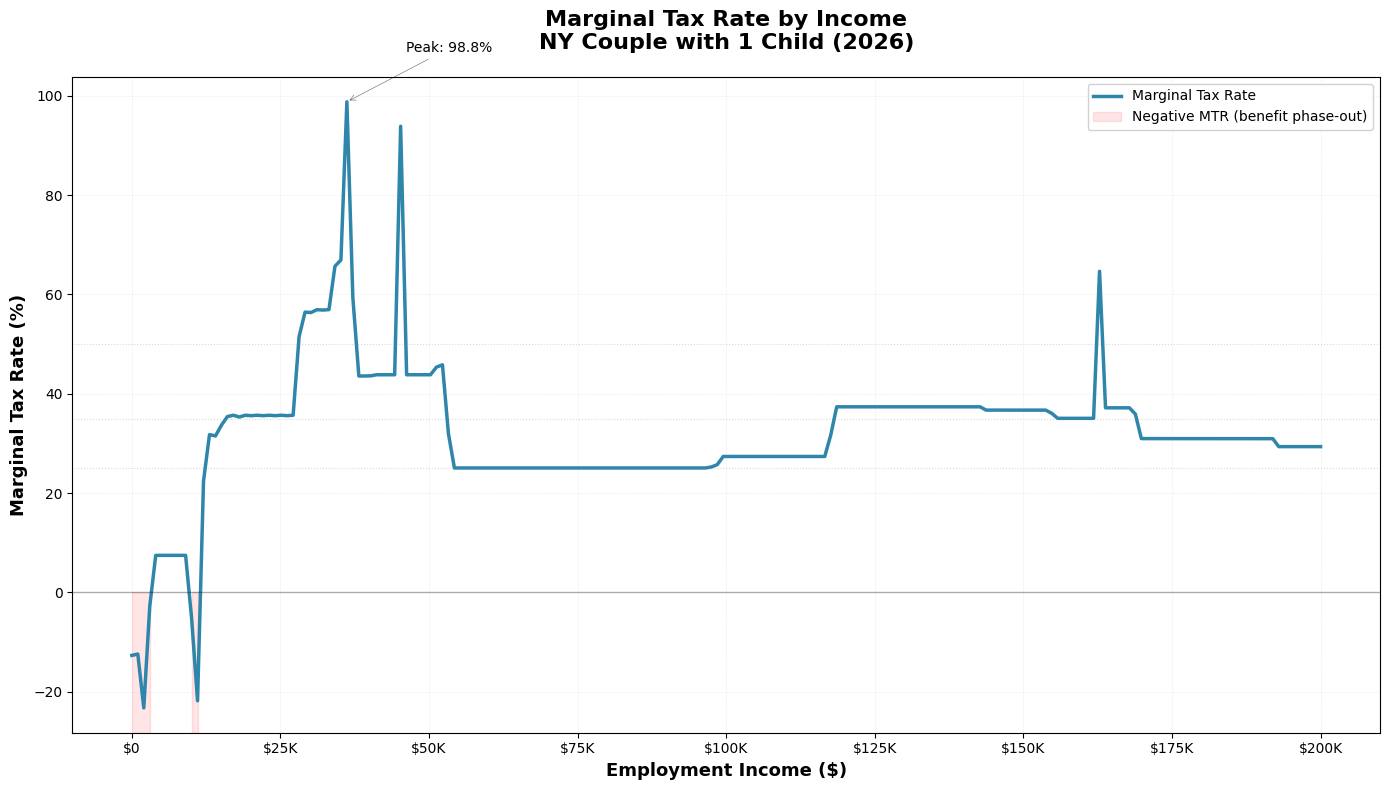


=== Marginal Tax Rate Statistics ===
Minimum MTR: -23.27% at $2,010
Maximum MTR: 98.80% at $36,181
Average MTR: 31.93%
Median MTR: 30.96%

Income ranges with negative MTR (benefit cliffs):
  $0 - $3,015
  $10,050 - $11,055


In [11]:
import matplotlib.pyplot as plt
import numpy as np

# The MTR array has 3 values per income point (likely for each person in household)
# Let's extract just the primary earner values (every 3rd value starting from index 0)
mtr_primary = mtr[::3]

# Get the income values from the simulation axes
income_values = np.linspace(0, 200000, 200)

# Verify the lengths match
print(f"Income values: {len(income_values)}")
print(f"MTR values: {len(mtr_primary)}")

# Create the plot
fig, ax = plt.subplots(figsize=(14, 8))

# Plot marginal tax rate
ax.plot(income_values, mtr_primary * 100, linewidth=2.5, color='#2E86AB', label='Marginal Tax Rate')

# Format the plot
ax.set_xlabel('Employment Income ($)', fontsize=13, fontweight='bold')
ax.set_ylabel('Marginal Tax Rate (%)', fontsize=13, fontweight='bold')
ax.set_title('Marginal Tax Rate by Income\nNY Couple with 1 Child (2026)', fontsize=16, fontweight='bold', pad=20)

# Add grid for better readability
ax.grid(True, alpha=0.2, linestyle='--', linewidth=0.5)

# Format x-axis to show dollar amounts
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K' if x > 0 else '$0'))

# Set y-axis limits to show full range including negative rates
y_min = min(mtr_primary * 100) - 5
y_max = max(mtr_primary * 100) + 5
ax.set_ylim(y_min, y_max)

# Add horizontal line at 0% for reference
ax.axhline(y=0, color='black', linestyle='-', alpha=0.3, linewidth=1)

# Add some key rate lines for reference
ax.axhline(y=25, color='gray', linestyle=':', alpha=0.3, linewidth=0.8)
ax.axhline(y=35, color='gray', linestyle=':', alpha=0.3, linewidth=0.8)
ax.axhline(y=50, color='gray', linestyle=':', alpha=0.3, linewidth=0.8)

# Highlight negative MTR regions
negative_mtr = mtr_primary < 0
if np.any(negative_mtr):
    ax.fill_between(income_values, y_min, 0, where=negative_mtr, 
                    alpha=0.1, color='red', label='Negative MTR (benefit phase-out)')

# Add annotations for interesting points
max_mtr_idx = np.argmax(mtr_primary)
max_mtr_value = mtr_primary[max_mtr_idx] * 100
max_mtr_income = income_values[max_mtr_idx]

ax.annotate(f'Peak: {max_mtr_value:.1f}%', 
            xy=(max_mtr_income, max_mtr_value), 
            xytext=(max_mtr_income + 10000, max_mtr_value + 10),
            fontsize=10,
            arrowprops=dict(arrowstyle='->', color='black', alpha=0.5, lw=0.5))

# Show the plot
ax.legend(loc='upper right', framealpha=0.9)
plt.tight_layout()
plt.show()

# Print detailed statistics
print(f"\n=== Marginal Tax Rate Statistics ===")
print(f"Minimum MTR: {min(mtr_primary)*100:.2f}% at ${income_values[np.argmin(mtr_primary)]:,.0f}")
print(f"Maximum MTR: {max(mtr_primary)*100:.2f}% at ${income_values[np.argmax(mtr_primary)]:,.0f}")
print(f"Average MTR: {np.mean(mtr_primary)*100:.2f}%")
print(f"Median MTR: {np.median(mtr_primary)*100:.2f}%")

# Find income ranges with negative MTR
negative_ranges = []
in_negative = False
start_income = 0
for i, rate in enumerate(mtr_primary):
    if rate < 0 and not in_negative:
        start_income = income_values[i]
        in_negative = True
    elif rate >= 0 and in_negative:
        negative_ranges.append((start_income, income_values[i-1]))
        in_negative = False

if negative_ranges:
    print(f"\nIncome ranges with negative MTR (benefit cliffs):")
    for start, end in negative_ranges:
        print(f"  ${start:,.0f} - ${end:,.0f}")

In [12]:
# Run the simulation with marginal_tax_rate_including_health_benefits
from policyengine_us import Simulation

situation = {
  "people": {
    "you": {
      "age": {
        "2026": 40
      }
    },
    "your partner": {
      "age": {
        "2026": 40
      }
    },
    "your first dependent": {
      "age": {
        "2026": 3
      }
    }
  },
  "families": {
    "your family": {
      "members": [
        "you",
        "your partner",
        "your first dependent"
      ]
    }
  },
  "marital_units": {
    "your marital unit": {
      "members": [
        "you",
        "your partner"
      ]
    },
    "your first dependent's marital unit": {
      "members": [
        "your first dependent"
      ],
      "marital_unit_id": {
        "2026": 1
      }
    }
  },
  "tax_units": {
    "your tax unit": {
      "members": [
        "you",
        "your partner",
        "your first dependent"
      ]
    }
  },
  "spm_units": {
    "your household": {
      "members": [
        "you",
        "your partner",
        "your first dependent"
      ]
    }
  },
  "households": {
    "your household": {
      "members": [
        "you",
        "your partner",
        "your first dependent"
      ],
      "state_name": {
        "2026": "NY"
      },
      "county_fips": {
        "2026": "36061"
      }
    }
  },
  "axes": [
    [
      {
        "name": "employment_income",
        "count": 200,
        "min": 0,
        "max": 200000
      }
    ]
  ]
}

simulation = Simulation(
    situation=situation,
)

# Calculate marginal tax rate including health benefits
mtr_health = simulation.calculate("marginal_tax_rate_including_health_benefits", 2026)
print(f"MTR with health benefits array length: {len(mtr_health)}")
print(f"First 10 values: {mtr_health[:10]}")

MTR with health benefits array length: 600
First 10 values: [-0.12699604 -0.12699604  0.         -0.12430084 -0.12430084  0.
 -0.2327187  -0.2327187   0.         -0.02779686]


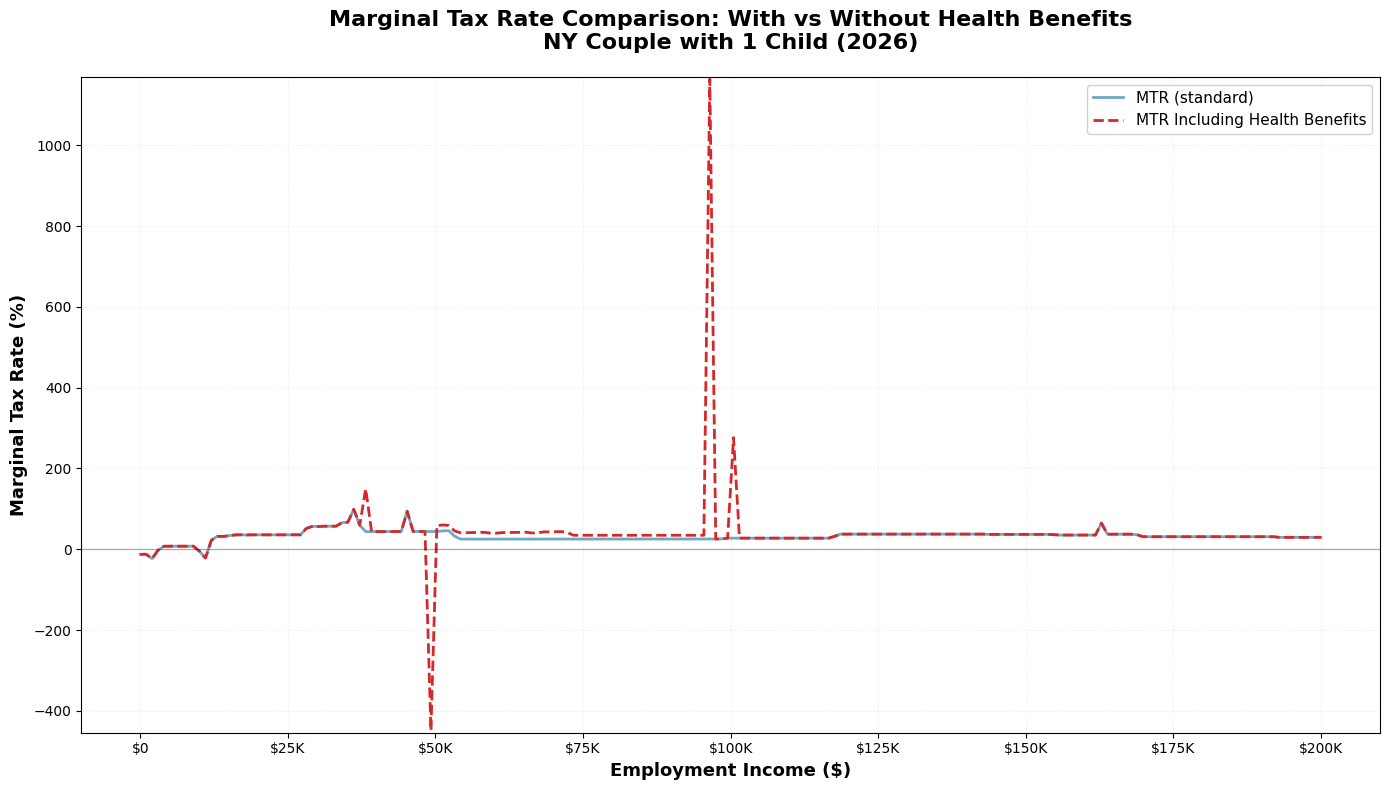


=== Marginal Tax Rate Comparison ===

Standard MTR:
  Minimum: -23.27% at $2,010
  Maximum: 98.80% at $36,181
  Average: 31.93%

MTR Including Health Benefits:
  Minimum: -449.23% at $49,246
  Maximum: 1163.94% at $96,482
  Average: 39.86%

Largest difference: 1138.89% at $96,482
Income points with significant difference: 50 out of 200


In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Extract primary earner values (every 3rd value)
mtr_health_primary = mtr_health[::3]

# Get the income values from the simulation axes
income_values = np.linspace(0, 200000, 200)

# Create the plot comparing both MTRs
fig, ax = plt.subplots(figsize=(14, 8))

# Plot both marginal tax rates
ax.plot(income_values, mtr_primary * 100, linewidth=2, color='#2E86AB', 
        label='MTR (standard)', alpha=0.7)
ax.plot(income_values, mtr_health_primary * 100, linewidth=2, color='#D62828', 
        label='MTR Including Health Benefits', linestyle='--')

# Format the plot
ax.set_xlabel('Employment Income ($)', fontsize=13, fontweight='bold')
ax.set_ylabel('Marginal Tax Rate (%)', fontsize=13, fontweight='bold')
ax.set_title('Marginal Tax Rate Comparison: With vs Without Health Benefits\nNY Couple with 1 Child (2026)', 
             fontsize=16, fontweight='bold', pad=20)

# Add grid for better readability
ax.grid(True, alpha=0.2, linestyle='--', linewidth=0.5)

# Format x-axis to show dollar amounts
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K' if x > 0 else '$0'))

# Set y-axis limits
y_min = min(min(mtr_primary * 100), min(mtr_health_primary * 100)) - 5
y_max = max(max(mtr_primary * 100), max(mtr_health_primary * 100)) + 5
ax.set_ylim(y_min, y_max)

# Add horizontal line at 0% for reference
ax.axhline(y=0, color='black', linestyle='-', alpha=0.3, linewidth=1)

# Add legend
ax.legend(loc='upper right', framealpha=0.9, fontsize=11)

plt.tight_layout()
plt.show()

# Print comparison statistics
print(f"\n=== Marginal Tax Rate Comparison ===")
print(f"\nStandard MTR:")
print(f"  Minimum: {min(mtr_primary)*100:.2f}% at ${income_values[np.argmin(mtr_primary)]:,.0f}")
print(f"  Maximum: {max(mtr_primary)*100:.2f}% at ${income_values[np.argmax(mtr_primary)]:,.0f}")
print(f"  Average: {np.mean(mtr_primary)*100:.2f}%")

print(f"\nMTR Including Health Benefits:")
print(f"  Minimum: {min(mtr_health_primary)*100:.2f}% at ${income_values[np.argmin(mtr_health_primary)]:,.0f}")
print(f"  Maximum: {max(mtr_health_primary)*100:.2f}% at ${income_values[np.argmax(mtr_health_primary)]:,.0f}")
print(f"  Average: {np.mean(mtr_health_primary)*100:.2f}%")

# Calculate the difference
mtr_diff = mtr_health_primary - mtr_primary
max_diff_idx = np.argmax(np.abs(mtr_diff))
print(f"\nLargest difference: {mtr_diff[max_diff_idx]*100:.2f}% at ${income_values[max_diff_idx]:,.0f}")

# Count where they differ significantly (more than 0.1%)
significant_diff = np.abs(mtr_diff) > 0.001
print(f"Income points with significant difference: {np.sum(significant_diff)} out of {len(mtr_diff)}")

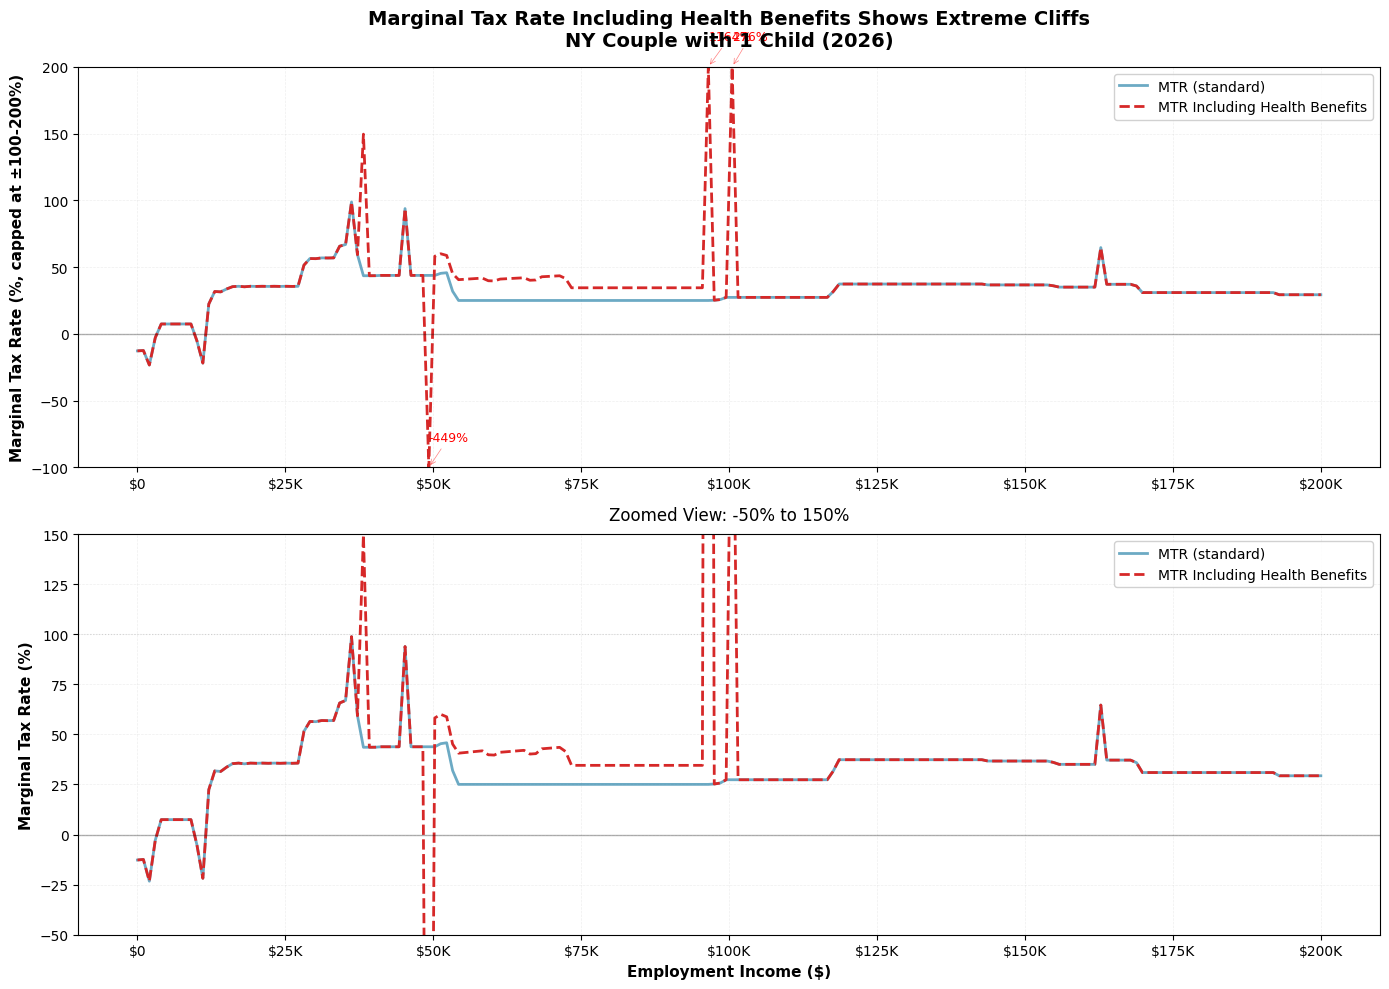


=== Health Insurance Subsidy Cliffs ===
Found 4 income points with MTR > 100% (absolute value)

Most severe cliffs:
  $96,482: 1163.9% MTR
  $49,246: -449.2% MTR
  $100,503: 276.3% MTR
  $38,191: 149.6% MTR

=== Analysis ===
The extreme MTRs occur at specific income thresholds where:
1. ACA premium tax credits phase out (400% FPL cliff)
2. Cost-sharing reduction subsidies end
3. Medicaid/CHIP eligibility ends

These create situations where earning $1 more can cost thousands in lost subsidies.


In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Create a two-panel plot for better visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Top panel: Full view with capped display
ax1.plot(income_values, np.clip(mtr_primary * 100, -100, 200), linewidth=2, color='#2E86AB', 
        label='MTR (standard)', alpha=0.7)
ax1.plot(income_values, np.clip(mtr_health_primary * 100, -100, 200), linewidth=2, color='#D62828', 
        label='MTR Including Health Benefits', linestyle='--')

ax1.set_ylabel('Marginal Tax Rate (%, capped at ±100-200%)', fontsize=11, fontweight='bold')
ax1.set_title('Marginal Tax Rate Including Health Benefits Shows Extreme Cliffs\nNY Couple with 1 Child (2026)', 
             fontsize=14, fontweight='bold', pad=15)
ax1.grid(True, alpha=0.2, linestyle='--', linewidth=0.5)
ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K' if x > 0 else '$0'))
ax1.set_ylim(-100, 200)
ax1.axhline(y=0, color='black', linestyle='-', alpha=0.3, linewidth=1)
ax1.legend(loc='upper right', framealpha=0.9, fontsize=10)

# Add annotations for extreme values
extreme_points = []
for i, val in enumerate(mtr_health_primary):
    if abs(val) > 2:  # Greater than 200%
        extreme_points.append((income_values[i], val * 100))

for income, rate in extreme_points[:3]:  # Show first 3 extreme points
    ax1.annotate(f'{rate:.0f}%', 
                xy=(income, np.clip(rate, -100, 200)), 
                xytext=(income, np.clip(rate, -100, 200) + 20),
                fontsize=9, color='red',
                arrowprops=dict(arrowstyle='->', color='red', alpha=0.5, lw=0.5))

# Bottom panel: Zoomed in view (-50% to 150%)
ax2.plot(income_values, mtr_primary * 100, linewidth=2, color='#2E86AB', 
        label='MTR (standard)', alpha=0.7)
ax2.plot(income_values, mtr_health_primary * 100, linewidth=2, color='#D62828', 
        label='MTR Including Health Benefits', linestyle='--')

ax2.set_xlabel('Employment Income ($)', fontsize=11, fontweight='bold')
ax2.set_ylabel('Marginal Tax Rate (%)', fontsize=11, fontweight='bold')
ax2.set_title('Zoomed View: -50% to 150%', fontsize=12, pad=10)
ax2.grid(True, alpha=0.2, linestyle='--', linewidth=0.5)
ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K' if x > 0 else '$0'))
ax2.set_ylim(-50, 150)
ax2.axhline(y=0, color='black', linestyle='-', alpha=0.3, linewidth=1)
ax2.axhline(y=100, color='gray', linestyle=':', alpha=0.3, linewidth=0.8)
ax2.legend(loc='upper right', framealpha=0.9, fontsize=10)

plt.tight_layout()
plt.show()

# Identify the health subsidy cliff points
print("\n=== Health Insurance Subsidy Cliffs ===")
cliff_threshold = 1.0  # 100% MTR
cliffs = []
for i in range(len(mtr_health_primary)):
    if abs(mtr_health_primary[i]) > cliff_threshold:
        cliffs.append((income_values[i], mtr_health_primary[i] * 100))

print(f"Found {len(cliffs)} income points with MTR > 100% (absolute value)")
print("\nMost severe cliffs:")
sorted_cliffs = sorted(cliffs, key=lambda x: abs(x[1]), reverse=True)
for income, rate in sorted_cliffs[:5]:
    print(f"  ${income:,.0f}: {rate:.1f}% MTR")

# Calculate subsidy phase-out range
print("\n=== Analysis ===")
print("The extreme MTRs occur at specific income thresholds where:")
print("1. ACA premium tax credits phase out (400% FPL cliff)")
print("2. Cost-sharing reduction subsidies end")
print("3. Medicaid/CHIP eligibility ends")
print("\nThese create situations where earning $1 more can cost thousands in lost subsidies.")